In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import (cross_val_score, RepeatedStratifiedKFold,
    GridSearchCV)
from sklearn.feature_selection import (SelectKBest, chi2, mutual_info_classif,
    SelectFromModel)
from sklearn.linear_model import LogisticRegression

from paths import RAW_DIR
from display import cdisplay
from transformers import MinMaxScalerTransformer

In [3]:
data = pd.read_csv(RAW_DIR / 'heart_disease.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  GenHlth               253680 non-null  float64
 13  MentHlth              253680 non-null  float64
 14  PhysHlth              253680 non-null  float64
 15  

In [19]:
FEATURES = [
    'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
    'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
    'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
    'Education', 'Income']

SELECTED_FEATURES = [
    'Age', 'HighBP', 'HighChol', 'Income', 'Fruits', 'Education',
    'DiffWalk', 'Smoker', 'Diabetes', 'PhysHlth', 'Sex', 'Stroke',
    'BMI', 'MentHlth', 'HvyAlcoholConsump']

TARGET = 'HeartDiseaseorAttack'

NUMERIC = ['BMI', 'Age']
CATEGORICAL = [
    'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'Diabetes',
    'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth',
    'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Education', 'Income']

y = data[TARGET]
X = data[FEATURES]
X_selected = data[SELECTED_FEATURES]
X_scaled = MinMaxScalerTransformer().fit_transform(data[FEATURES])

# All features

Train with all the variables and observations.

## LinearDiscriminantAnalysis

In [20]:
discriminant_analysis = LinearDiscriminantAnalysis()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(discriminant_analysis, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.901 (0.001)


In [28]:
discriminant_analysis = discriminant_analysis.fit(X, y)
data['proba'] = discriminant_analysis.predict_proba(X)[:, 1]
data['log_proba'] = discriminant_analysis.predict_log_proba(X)[:, 1]

In [29]:
data['log_proba'].describe()

count    253680.000000
mean         -3.180697
std           1.264812
min          -6.310463
25%          -4.156495
50%          -3.300073
75%          -2.332487
max          -0.014828
Name: log_proba, dtype: float64

<AxesSubplot: xlabel='log_proba', ylabel='Count'>

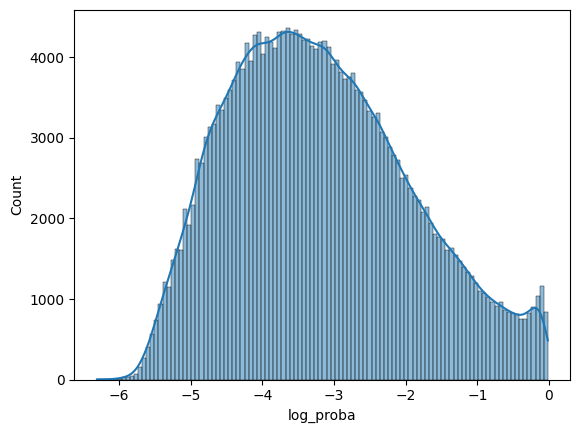

In [30]:
sns.histplot(data['log_proba'], kde=True)

In [22]:
cdisplay(data.head())

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,proba
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0.201723
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0.018923
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,0.191917
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0.031647
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0.063344


In [23]:
cdisplay(data[data[TARGET].eq(1)].head())

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,proba
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0,0.548278
20,1.0,1.0,1.0,1.0,22.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,30.0,0.0,1.0,0.0,12.0,4.0,4.0,0.756917
26,1.0,1.0,1.0,1.0,37.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,5.0,0.0,0.0,1.0,1.0,10.0,6.0,5.0,0.908822
27,1.0,1.0,1.0,1.0,28.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,12.0,2.0,4.0,0.340999
47,1.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0,10.0,4.0,7.0,0.122632


## Hyperparameter tunning for LinearDiscriminantAnalysis

In [ ]:
grid_shrinkage = {
    'solver': ['lsqr', 'eigen'],
    'shrinkage': np.arange(0, 1, 0.01),

}

search_shrinkage = GridSearchCV(
    discriminant_analysis,
    grid_shrinkage,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1
)
results_shrinkage = search_shrinkage.fit(X, y)

In [ ]:
# summarize
print('Mean Accuracy: %.3f' % results_shrinkage.best_score_)
print('Config: %s' % results_shrinkage.best_params_)

In [ ]:
grid_solver = {
    'solver': ['svd', 'lsqr', 'eigen'],
}

search_solver = GridSearchCV(
    discriminant_analysis,
    grid_solver,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1
)
results_solver = search_solver.fit(X, y)

In [ ]:
# summarize
print('Mean Accuracy: %.3f' % results_solver.best_score_)
print('Config: %s' % results_solver.best_params_)

This analysis suggest that it's better to use the solver `lqrs` with shrinkage 0.01, given that the accuracy metric improve with those parameters.

## Scaled features

In [ ]:
grid_scaled = {
    'solver': ['lsqr', 'eigen'],
    'shrinkage': np.arange(0, 1, 0.01),

}

search_scaled = GridSearchCV(
    discriminant_analysis,
    grid_scaled,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1
)
results_scaled = search_scaled.fit(X_scaled, y_scaled)

In [ ]:
# summarize
print('Mean Accuracy: %.3f' % results_scaled.best_score_)
print('Config: %s' % results_scaled.best_params_)

In [ ]:
grid_scaled_solver = {
    'solver': ['svd', 'lsqr', 'eigen'],
}

search_scaled_solver = GridSearchCV(
    discriminant_analysis,
    grid_scaled_solver,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1
)
results_scaled_solver = search_scaled_solver.fit(X_scaled, y_scaled)

In [ ]:
# summarize
print('Mean Accuracy: %.3f' % search_scaled_solver.best_score_)
print('Config: %s' % search_scaled_solver.best_params_)

With the scaled features we obtain a similar result, with slightly less accuracy and shrinkage equals to 0.07.